WRITING NAME IS DEVNAGIRI

In [43]:
dev_name = "\u0938\u093F\u092E\u0930\u0928 \u092E\u0924\u092A\u093E\u0932"

print(dev_name)

सिमरन मतपाल


IMPORTING LIBRARIES

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [45]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')


In [46]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [47]:
#Shape 
print("Number of Samples:", df.shape[0])
print("Number of Features:", df.shape[1])

Number of Samples: 500
Number of Features: 9


In [48]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


DROPPING THE UNNECESSARY "SERIAL NUMBER" COLUMN

In [49]:
df = df.drop('Serial No.',axis=1)

In [50]:
df.shape

(500, 8)

CALCULATING THE THRESHOLD

In [51]:
#Calculate the threshold using the 75th percentile
threshold = df['Chance of Admit '].describe()['75%']

#Create the 'Admitted' column based on the threshold(1 for admitted and 0 for not admitted)
df['Admitted'] = (df['Chance of Admit '] >= threshold).astype(int)

# Drop the original 'Chance of Admit ' column as it's now converted
df = df.drop(['Chance of Admit '], axis=1)


#Check for class imbalance and display results
admitted_counts = df['Admitted'].value_counts()
print(f"Threshold (75th percentile) for 'Chance of Admit ': {threshold}")
print("\nClass Distribution (0: Not Admitted, 1: Admitted):")
print(admitted_counts)


Threshold (75th percentile) for 'Chance of Admit ': 0.82

Class Distribution (0: Not Admitted, 1: Admitted):
Admitted
0    367
1    133
Name: count, dtype: int64


BALANCING THE DATASET USING UPSCALING TECHNIQUE

In [52]:
# Check the original class distribution
admitted_counts = df['Admitted'].value_counts()
print("Original Class Distribution (0: Not Admitted, 1: Admitted):")
print(admitted_counts)

# Separate the majority and minority classes
df_majority = df[df['Admitted'] == 0]  # Not Admitted
df_minority = df[df['Admitted'] == 1]  # Admitted

# Upsample the minority class to match the majority class size
df_minority_upsampled = resample(
    df_minority,
    replace=True,        # Sample with replacement
    n_samples=len(df_majority),  # Match the majority class size
    random_state=42      # For reproducibility
)

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Check the new balanced class distribution
balanced_counts = df_balanced['Admitted'].value_counts()
print("\nBalanced Class Distribution (After Upsampling):")
print(balanced_counts)


Original Class Distribution (0: Not Admitted, 1: Admitted):
Admitted
0    367
1    133
Name: count, dtype: int64

Balanced Class Distribution (After Upsampling):
Admitted
0    367
1    367
Name: count, dtype: int64


KEEPING ONLY RELEVANT FEATURES

In [53]:
# Select relevant features (X) and target (y)
x = df_balanced[['GRE Score', 'University Rating', 'CGPA']]
y = df_balanced['Admitted']

# Keep only the relevant columns in the balanced dataset
df_balanced = df_balanced[['GRE Score', 'University Rating', 'CGPA', 'Admitted']]

# Display the first few rows of the modified balanced DataFrame
print("First few rows of the balanced dataset:")
print(df_balanced.head())


First few rows of the balanced dataset:
   GRE Score  University Rating  CGPA  Admitted
1        324                  4  8.87         0
2        316                  3  8.00         0
3        322                  3  8.67         0
4        314                  2  8.21         0
6        321                  3  8.20         0


SPLITTING THE DATA INTO TRAIN AND TEST

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

FUNCTION TO CREATE AND EVALUATE DECISION TREE

Criterion: gini
Training Accuracy: 0.9564
Testing Accuracy: 0.9402

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       278
           1       0.93      0.99      0.96       272

    accuracy                           0.96       550
   macro avg       0.96      0.96      0.96       550
weighted avg       0.96      0.96      0.96       550


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.91      0.94        89
           1       0.92      0.97      0.94        95

    accuracy                           0.94       184
   macro avg       0.94      0.94      0.94       184
weighted avg       0.94      0.94      0.94       184



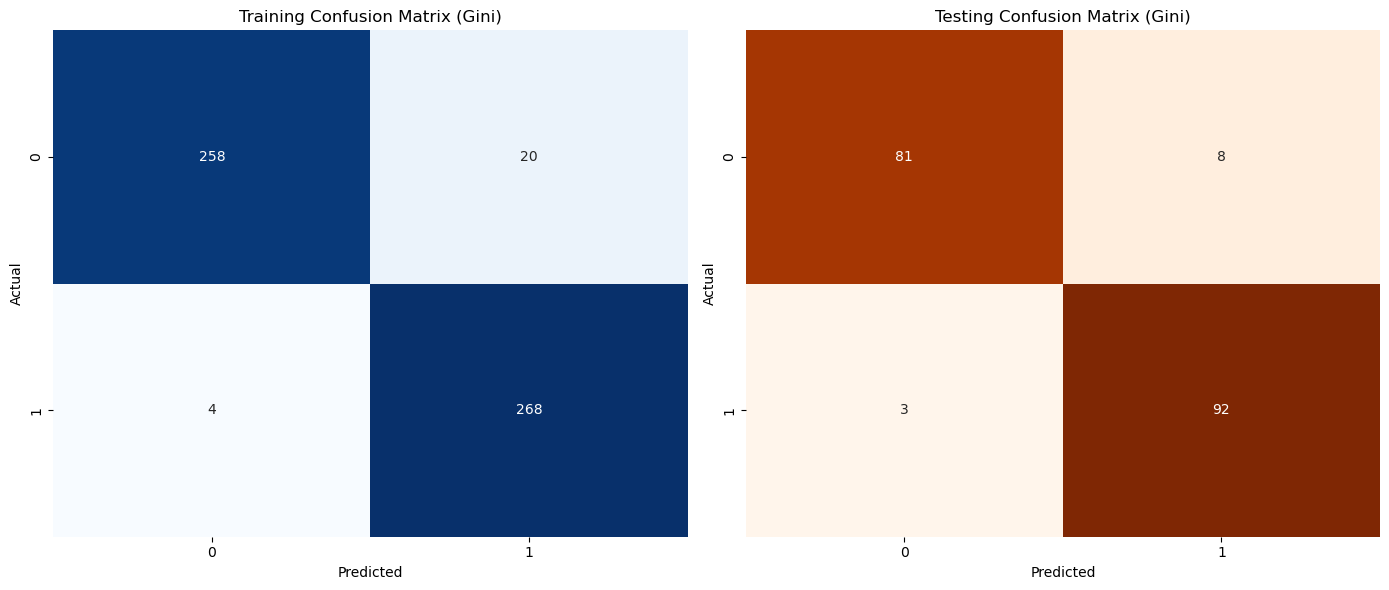

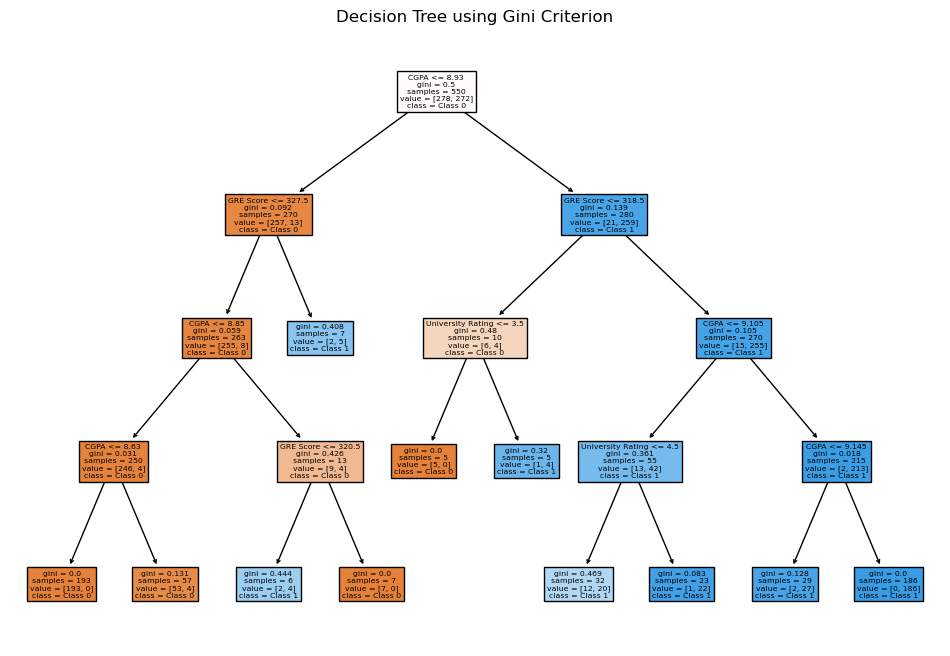

In [55]:


# Function to train and evaluate a pruned decision tree
def train_and_evaluate_pruned(criterion, x_train, y_train, x_test, y_test):
    # Initialize and train the decision tree
    model = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=4,               
        min_samples_split=10,      
        min_samples_leaf=5,        
        random_state=14
    )
    model.fit(x_train, y_train)

    # Predict and evaluate on training data
    y_train_pred = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_report = classification_report(y_train, y_train_pred)

    # Predict and evaluate on testing data
    y_test_pred = model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)

    return {
        "criterion": criterion,
        "model": model,
        "train_accuracy": train_accuracy,
        "train_conf_matrix": train_conf_matrix,
        "train_report": train_report,
        "test_accuracy": test_accuracy,
        "test_conf_matrix": test_conf_matrix,
        "test_report": test_report,
    }

# Function to display evaluation results and visualize the decision tree and confusion matrices
def display_results(results, feature_names):
    print(f"Criterion: {results['criterion']}")
    print(f"Training Accuracy: {results['train_accuracy']:.4f}")
    print(f"Testing Accuracy: {results['test_accuracy']:.4f}")
    print("\nClassification Report (Train):\n", results['train_report'])
    print("\nClassification Report (Test):\n", results['test_report'])

    # Visualize the confusion matrix for the training set
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(results['train_conf_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Training Confusion Matrix ({results["criterion"].capitalize()})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Visualize the confusion matrix for the testing set
    plt.subplot(1, 2, 2)
    sns.heatmap(results['test_conf_matrix'], annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.title(f'Testing Confusion Matrix ({results["criterion"].capitalize()})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Visualize the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(results['model'], filled=True, feature_names=feature_names, class_names=['Class 0', 'Class 1'])
    plt.title(f"Decision Tree using {results['criterion'].capitalize()} Criterion")
    plt.show()

# Assuming x_train, x_test, y_train, y_test are defined using train_test_split

# Train and evaluate pruned Decision Trees using Gini and Entropy criteria
gini_results = train_and_evaluate_pruned('gini', x_train, y_train, x_test, y_test)
entropy_results = train_and_evaluate_pruned('entropy', x_train, y_train, x_test, y_test)

# Display results for pruned gini tree
display_results(gini_results, x_train.columns)


Criterion: entropy
Training Accuracy: 0.9527
Testing Accuracy: 0.9293

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       278
           1       0.95      0.95      0.95       272

    accuracy                           0.95       550
   macro avg       0.95      0.95      0.95       550
weighted avg       0.95      0.95      0.95       550


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        89
           1       0.94      0.93      0.93        95

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.93      0.93      0.93       184



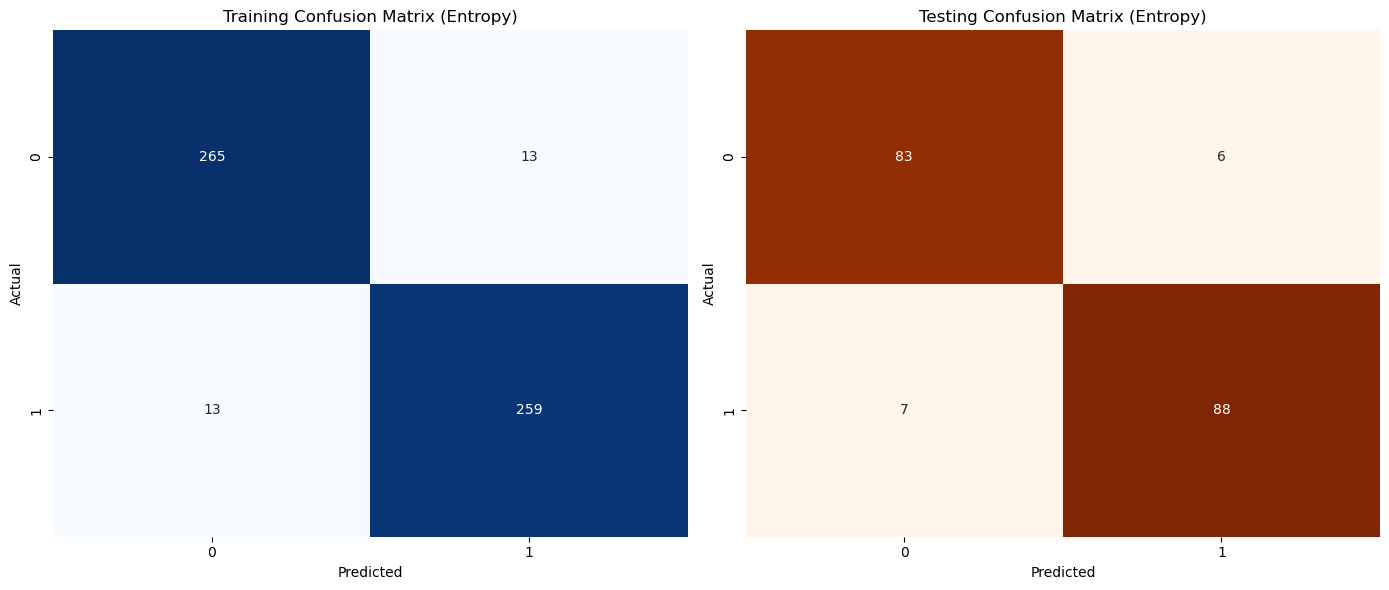

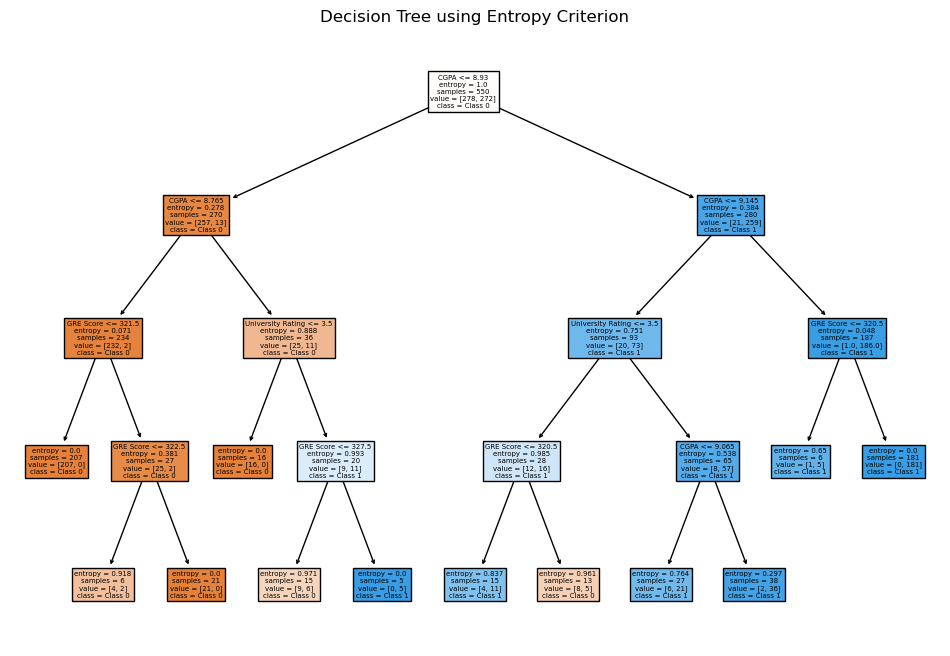

In [56]:
# Display results for the pruned Entropy tree
display_results(entropy_results, x_train.columns)
